In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
data = pd.read_excel('/Users/Owner/OneDrive/Desktop/PGA_Final.xlsx')
del data['Unnamed: 0']
data

,PLAYER NAME,ROUNDS,DISTANCE,TOURNAMENT,ROUND,HOLE,COURSE,YEAR
0,Lee Westwood,65,425,Byron Nelson,3,8,894,2021
1,Cameron Champ,79,424,Sentry,4,7,656,2021
2,Connor Syme,2,423,U.S. Open(2020),2,4,891,2021
3,Dustin Johnson,75,419,U.S. Open(2020),4,9,891,2021
4,Bryson DeChambeau,83,414,Sentry,2,12,656,2021
...,...,...,...,...,...,...,...,...
5317,Lion Kim,2,273,Masters,2,1,14,2011
5318,Michael Campbell,2,272,U.S. Open,2,1,24,2011
5319,Beau Hossler,2,270,U.S. Open,1,1,24,2011
5320,Larry Mize,2,269,Masters,2,1,14,2011


Text(0.5, 1.0, 'Longest Drive')

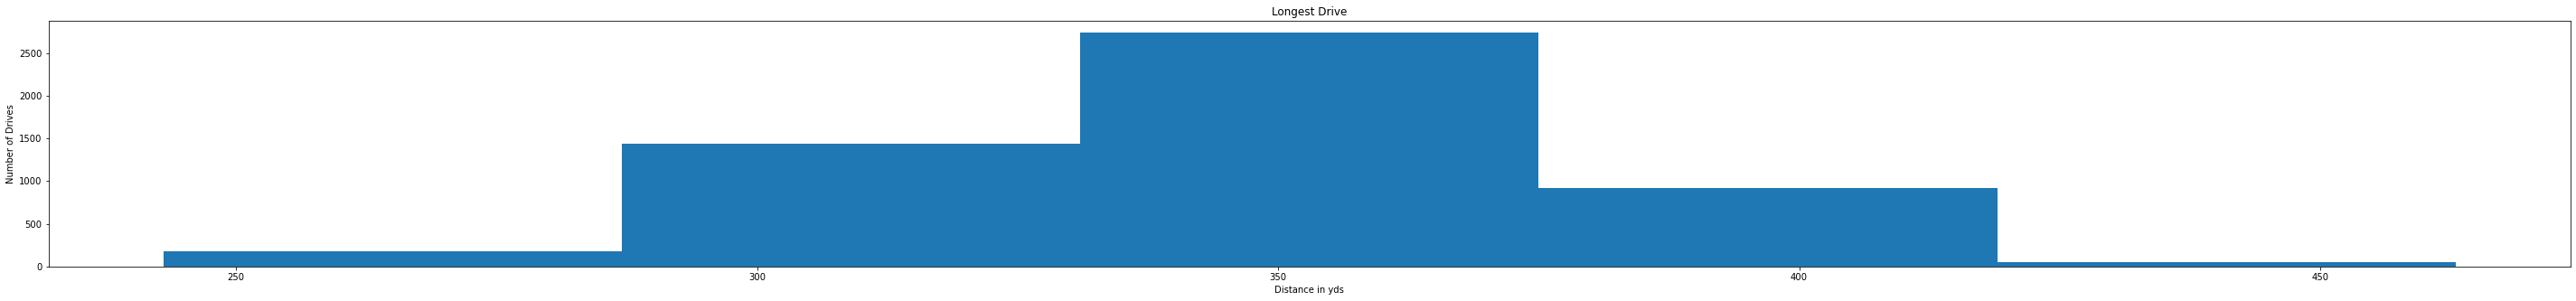

In [2]:
#avg distance
distance=data['DISTANCE']
distance_array = np.array(distance)
plt.figure(figsize = (50,5))
plt.hist(distance_array, bins=5)
plt.xlabel('Distance in yds')
plt.ylabel('Number of Drives')
plt.title('Longest Drive')

In [3]:
#data points in each year
years = data.groupby('YEAR')['YEAR'].count()
years

YEAR
2011    579
2012    580
2013    201
2014    194
2015    202
2016    592
2017    610
2018    626
2019    619
2020    485
2021    634
Name: YEAR, dtype: int64

In [4]:
#average driving distance by each player in past 10 years
a=[]
for i in data['PLAYER NAME']:
    a.append(i)
a=pd.unique(a)

b=[]

for x in a:
    players=data[data['PLAYER NAME']== x]
    player_dist=players['DISTANCE'].mean()
    b.append(player_dist)
b

player_avg_distance = dict(zip(a,b))
player_avg_distance['Tiger Woods']

367.22222222222223

In [5]:
#average rounds played by each player in past 10 years

c=[]
for i in data['PLAYER NAME']:
    c.append(i)
c=pd.unique(c)

d=[]

for x in a:
    players=data[data['PLAYER NAME']== x]
    player_dist=players['ROUNDS'].mean()
    d.append(player_dist)


players_rounds = dict(zip(c,d))
players_rounds['Tiger Woods']

35.333333333333336

In [6]:
df_numerical = data._get_numeric_data()
df_numerical.describe()

,ROUNDS,DISTANCE,ROUND,HOLE,COURSE,YEAR
count,5322.000000,5322.000000,5322.000000,5322.000000,5322.000000,5322.000000
mean,33.889515,346.966366,2.039835,8.883127,499.229989,2016.454904
std,35.275342,31.728626,1.040033,5.835097,313.659488,3.294014
min,1.000000,243.000000,1.000000,1.000000,4.000000,2011.000000
25%,2.000000,325.000000,1.000000,3.000000,104.000000,2013.000000
50%,13.000000,350.000000,2.000000,9.000000,656.000000,2017.000000
75%,70.000000,369.000000,3.000000,14.000000,752.000000,2019.000000
max,127.000000,463.000000,4.000000,18.000000,902.000000,2021.000000


In [7]:
#average distance by each tournament

e=[]
for i in data['TOURNAMENT']:
    e.append(i)
e=pd.unique(e)

f=[]

for x in e:
    players=data[data['TOURNAMENT']== x]
    player_dist=round(players['DISTANCE'].mean(),2)
    f.append(player_dist)


tournament = dict(zip(e,f))
tournament['Phoenix Open']

357.75

In [8]:
#average driving distance by each player in past 10 years
a=[]
for i in data['PLAYER NAME']:
    a.append(i)
a=pd.unique(a)

b=[]
bb=[]

for x in a:
    players=data[data['PLAYER NAME']== x]
    player_dist_max=players['DISTANCE'].max()
    player_dist_min=players['DISTANCE'].min()
    b.append(player_dist_min)
    bb.append(player_dist_max)


dist_min = dict(zip(a,b))
dist_max = dict(zip(a,bb))
dist_min['Tiger Woods'] 

322

<BarContainer object of 9 artists>

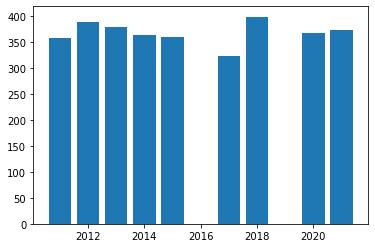

In [9]:
#tiger woods driving distance past 10 years
tw=data[data['PLAYER NAME']=='Tiger Woods']
x= tw.groupby('YEAR')['DISTANCE'].mean()
y=np.unique(tw['YEAR'])
plt.bar(y,x)

In [10]:
#finding the min, max and avg longest drive for a given player
output=[]
test = ['min','max','avg']
name=input('Player Name')
output.append(dist_min[name])
output.append(dist_max[name])
output.append(round(player_avg_distance[name],2))

print(dict(zip(test,output)))


Player Name Justin Thomas


{'min': 347, 'max': 449, 'avg': 390.67}


In [11]:
#what is the longest drive at a given tournament
tourn=[]
print(np.unique(data['TOURNAMENT']))
t=input('Tournament Name')
tourn.append(tournament[t])
print(tourn)

['3M Open' 'AT&T National' 'AT&T Pebble' 'Arnold Palmer' 'BMW Champ'
 'Barbasol' 'Barbasol Champ' 'Bermuda' 'Bob Hope' 'Byron Nelson'
 'Canadian Open' 'CareerBuilder' 'Charles Schwab' "Children's MNHC"
 'Crowne Plaza' 'DEAN & DELUCA' 'Desert Classic' 'Deutsche Bank' 'Farmers'
 'Farmers Ins' 'Farmers Ins.' 'Fort Worth Invt' 'Frys.com Open' 'Genesis'
 'Genesis Open' 'HP Byron Nelson' 'Honda' 'Honda Classic' 'Houston Open'
 'Humana' 'Hyundai T of C' 'J. Timberlake' 'JT Shriners' 'John Deere'
 'John Deere Clas' 'Masters' 'Masters (2020)' 'Masters (2021)' 'Mayakoba'
 'Memorial Tourn' 'NORTHERN TRUST' 'Northern Trust' 'PGA Champ'
 'PGA Championshi' 'Palmetto' 'Pebble Beach' 'Phoenix Open' 'Puerto Rico'
 'Puntacana' 'Puntacana(2020)' 'Puntacana(2021)' 'Quicken Loans'
 'RBC Canadian' 'RBC Heritage' 'Reno-Tahoe Open' 'Rocket Mortgage'
 'Safeway Open' 'Sanderson Farms' 'Sentry' 'Sentry T of C' 'Shell Houston'
 'Shriners' 'Shriners Hosp' 'Shriners Hosp.' 'Sony Open' 'St. Jude'
 'T of C' 'THE CJ C

Tournament Name 3M Open


[348.03]


In [ ]:
#input a player name and return longest drive over past 10 years
playername= input('Player Name')
abc=data[data['PLAYER NAME']==playername]
xxx= abc.groupby('YEAR')['DISTANCE'].mean()
yyy=np.unique(abc['YEAR'])
plt.bar(yyy,xxx)